# Trump's Approval Rating and The Stock Market 

![](https://forex-images.mt5.com/humor/source/mt5/img5a4cb01055031.png)
*www.mt5.com*

In [21]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200) # Display up to 120 columns of a dataframe

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
sns.set_style('darkgrid')

import trumps approval ratings. We used the [fivethirtyeight github repo for trump-approval-ratings](https://github.com/fivethirtyeight/data/tree/master/trump-approval-ratings). You can also find a great dashboard here on https://projects.fivethirtyeight.com/trump-approval-ratings/

In [2]:
rating = pd.read_csv("./approval_polllist.csv")
rating.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,11/16/2018,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.946437,0.0,46.0,37.0,42.95969,39.20849,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,17:44:57 16 Nov 2018
1,Donald Trump,All polls,11/16/2018,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,0.0,45.0,45.0,46.08260,43.28871,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,17:44:57 16 Nov 2018
2,Donald Trump,All polls,11/16/2018,1/20/2017,1/24/2017,Ipsos,B+,1632.0,a,0.224456,0.0,42.1,45.2,42.52667,44.05646,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,17:44:57 16 Nov 2018
3,Donald Trump,All polls,11/16/2018,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,0.0,45.0,46.0,46.08260,44.28871,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,17:44:57 16 Nov 2018
4,Donald Trump,All polls,11/16/2018,1/20/2017,1/25/2017,Quinnipiac University,A-,1190.0,rv,1.644662,0.0,36.0,44.0,37.71518,42.59451,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,17:44:57 16 Nov 2018


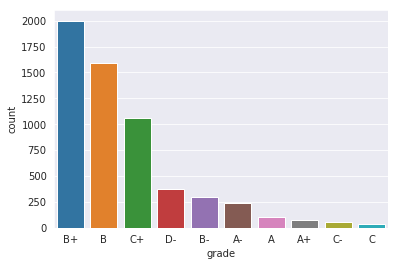

In [22]:
sns.countplot(x = 'grade', 
              data = rating, 
              order = rating['grade'].value_counts().index)

In [4]:
topline = pd.read_csv("./approval_topline.csv")
topline['date'] = pd.to_datetime(topline.modeldate)   # convert modeldate into a data time 
topline['date'] = topline.date.apply(lambda x: x.date())
topline.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp,date
0,Donald Trump,Voters,11/16/2018,43.56310,47.53812,39.58807,52.51929,56.58352,48.45506,17:45:56 16 Nov 2018,2018-11-16
1,Donald Trump,Adults,11/16/2018,41.73164,45.02438,38.43890,53.75866,58.26497,49.25236,17:45:23 16 Nov 2018,2018-11-16
2,Donald Trump,All polls,11/16/2018,42.45884,46.88390,38.03379,53.04454,57.37421,48.71488,17:44:57 16 Nov 2018,2018-11-16
3,Donald Trump,All polls,11/15/2018,42.42001,46.76006,38.07996,53.02117,57.32919,48.71315,16:01:02 15 Nov 2018,2018-11-15
4,Donald Trump,Adults,11/15/2018,41.75514,45.04311,38.46717,53.69690,58.17951,49.21428,16:01:26 15 Nov 2018,2018-11-15


In [ ]:
sns.lmplot(x = "timestamp", y = "approve_lo", data = topline,
          fit_reg = False, 
          hue= 'subgroup')

In [5]:
topline.date.describe()

count           1986
unique           662
top       2018-01-24
freq               3
Name: date, dtype: object

Trumps inauguration date was January 20, 2017, however the earliest poll that fivethirtyeight was able to gether was 1/23/2017. We work with what we can work with

In [11]:
topline.date.min()

datetime.date(2017, 1, 23)

## S&P500

Using S&P500 data from [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history/)

In [47]:
stocks = pd.read_csv("./sp500_11172018.csv")

# order and srot the date and then set the index to the date column
stocks['Date'] = stocks.Date.convert_objects(convert_dates='coerce')
stocks = stocks.sort_index(by="Date")
stocks = stocks.set_index("Date")
stocks.head()

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-23,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000
2017-01-24,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000
2017-01-25,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000
2017-01-26,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000
2017-01-27,2299.020020,2299.020020,2291.620117,2294.689941,2294.689941,3135890000


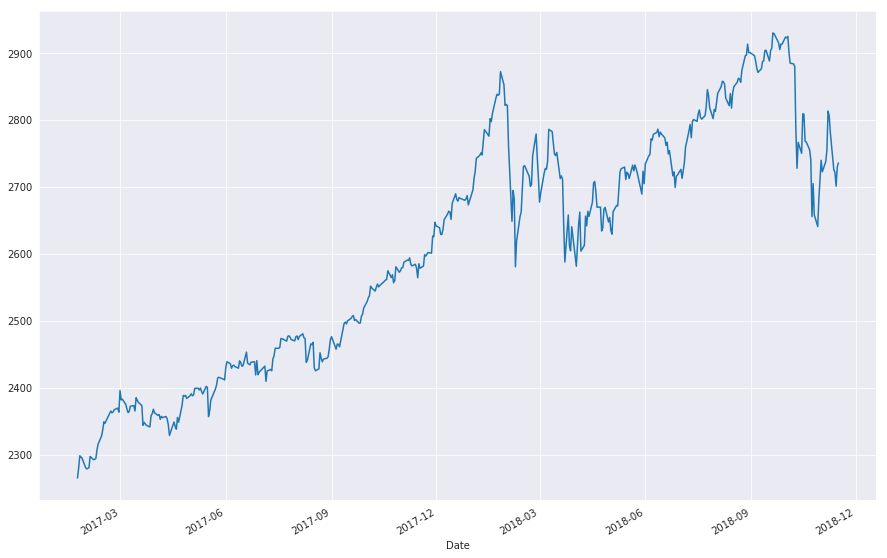

In [49]:
stocks.Close.plot(figsize = (15,10))

Some of the initally obvious things to note this the apparent volidility. Its difficult to pinpoint exactly what causes the volidility, however we are going to analysis trumps activity in accordance to the stock market. Typically the volitility in stock market is due to human emotion. For the most part we all have the same market information, however, it can make one to purchase and the other to see. 

In [46]:
stocks.index.min()

'2017-01-23'

## Sentiment Analysis @realdonaldtrump

Data Source: [Trump Twitter Archive](http://www.trumptwitterarchive.com/archive)

In [ ]:
tweets = pd.read_csv("./trump_tweets.csv")
tweets.head()